In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from extractors import ViTExtractor
from manipulators import Dataset
from requests.auth import HTTPBasicAuth
from skimage import io


2022-03-17 10:59:29.048515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


# Dataset cleaning

Prepare dataset -> load extracted dataset, imagelist and connection to media server

In [2]:
dataset = Dataset(imagelist_path = "extracted_features_merged/imagelist_jpg.txt", 
                 features_path = "extracted_features_merged/ViTExtractor__.npy",
                 media_server = "http://otrok.ms.mff.cuni.cz:4000/datasets/v3c1_original/frames/",
                 media_server_auth = HTTPBasicAuth('som', 'hunter'))

All methods are documented

In [3]:
help(Dataset.show_nth_neighbours)

Help on function show_nth_neighbours in module manipulators.dataset:

show_nth_neighbours(self, target: Union[int, numpy.ndarray], nths: collections.abc.Iterable)
    Shows the nths nearest neighbours.
    The target can be an id from the dataset or an 
    external feature vector.



Show images based on their id in range [0, dataset_length]

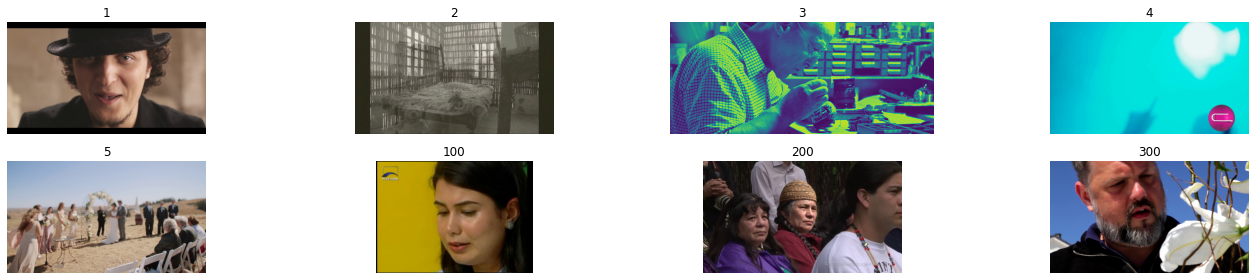

In [4]:
dataset.show_grid([1,2,3,4,5,100,200,300])

Show nearest neighbours

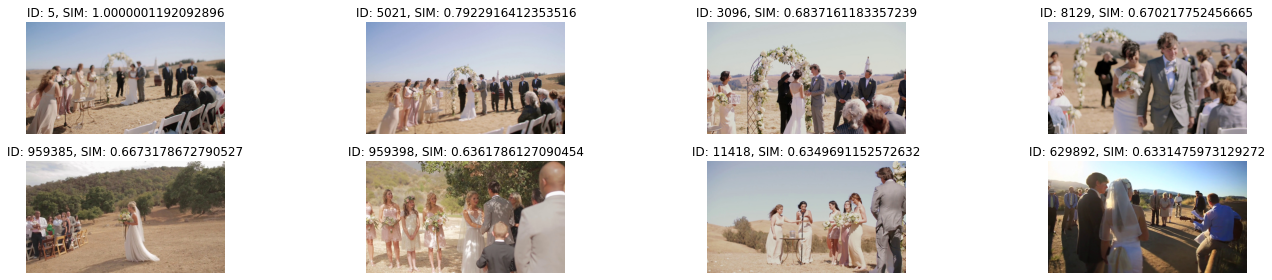

In [5]:
dataset.show_knn(5, k = 8)

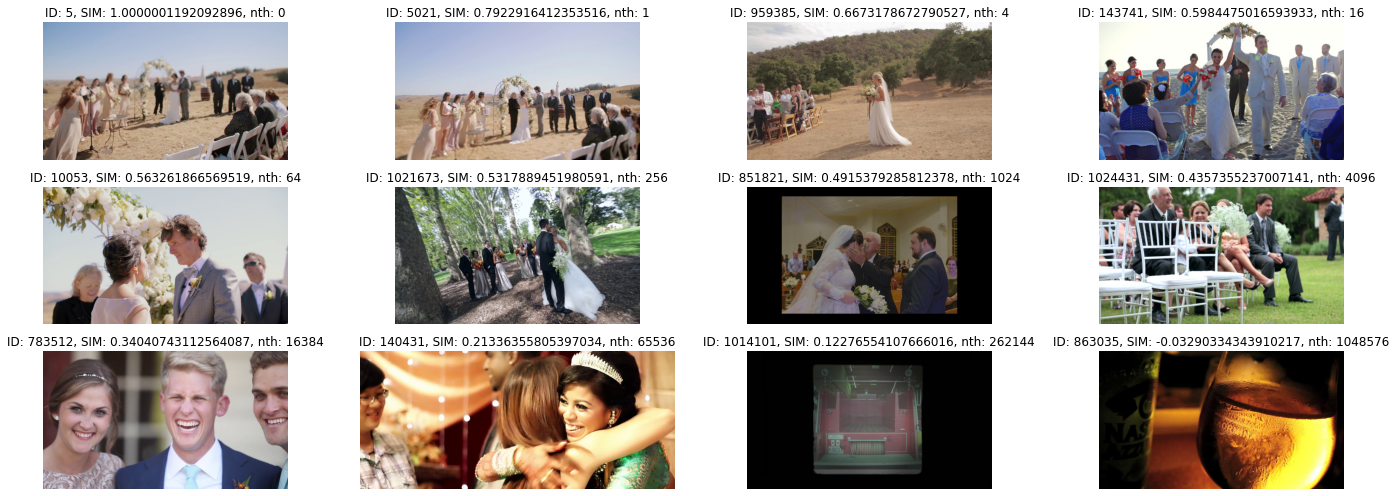

In [6]:
dataset.show_nth_neighbours(5, nths = [0] + [4 ** i for i in range(0, 11)])

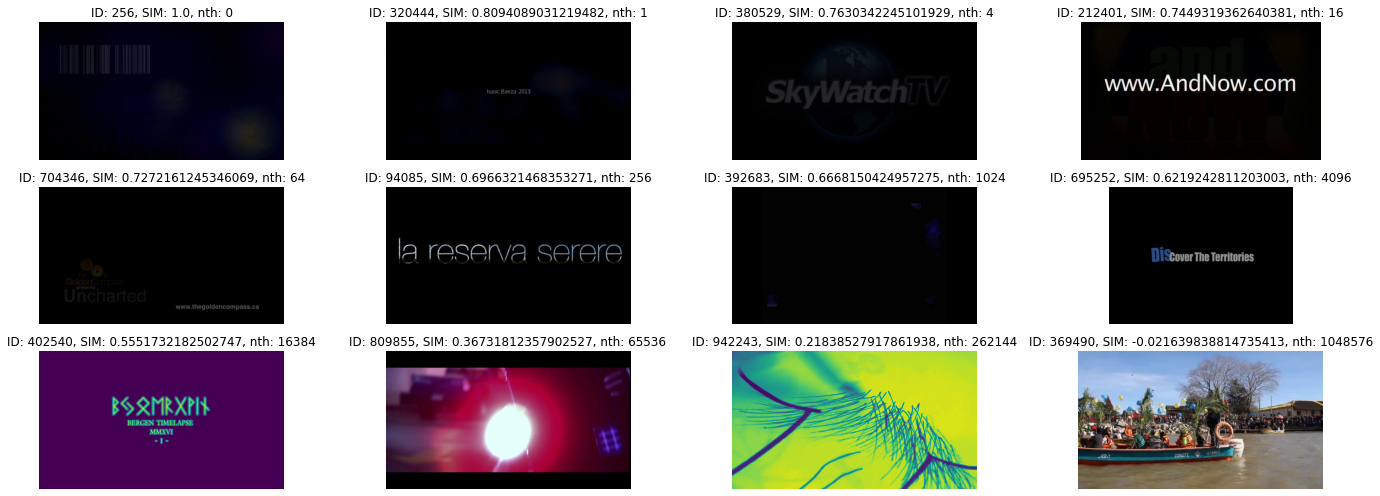

In [7]:
dataset.show_nth_neighbours(256, nths = [0] + [4 ** i for i in range(0, 11)])

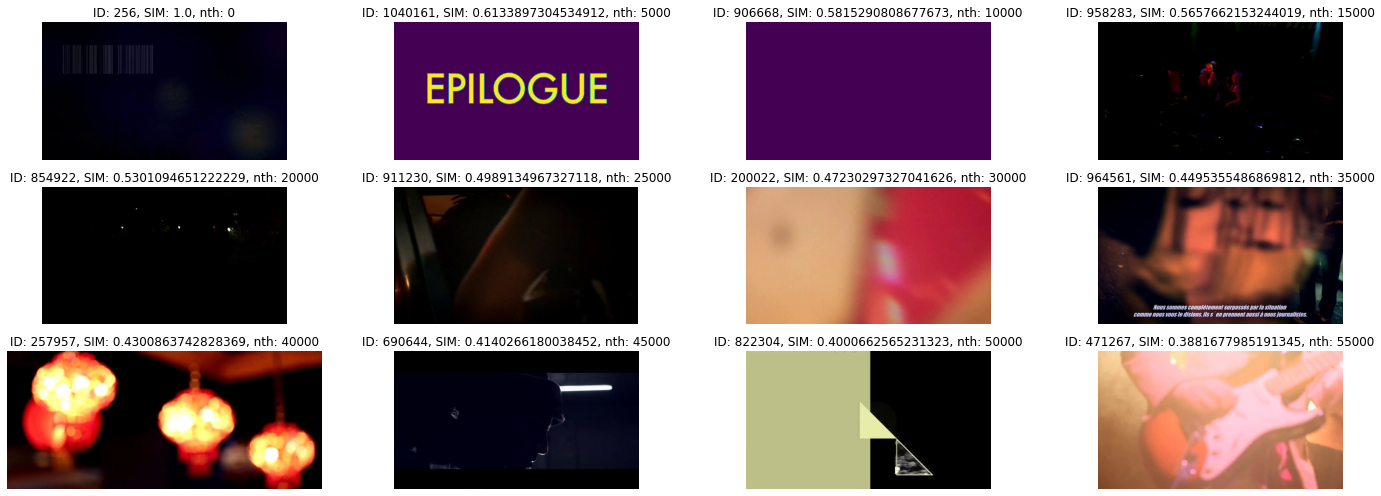

In [8]:
dataset.show_nth_neighbours(256, nths = [5000 * i for i in range(0, 12)])

In [9]:
extractor = ViTExtractor()

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

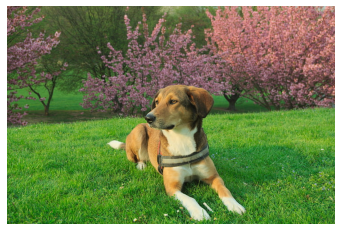

In [10]:
image = io.imread("samples/dog.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

dog_features = extractor(["samples/dog.jpg"])

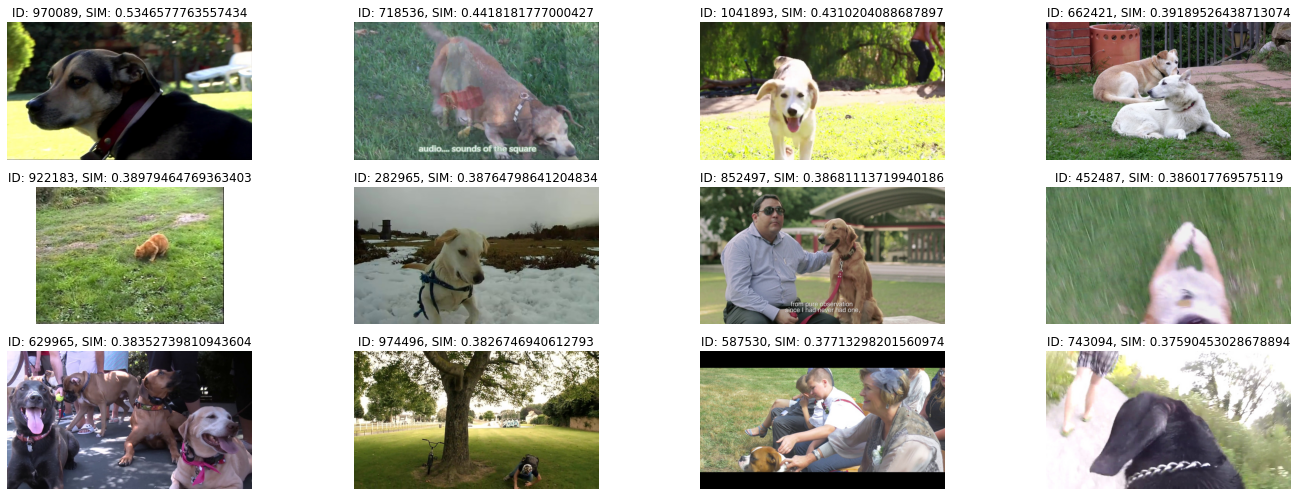

In [11]:
dataset.show_knn(dog_features[0], k=12)

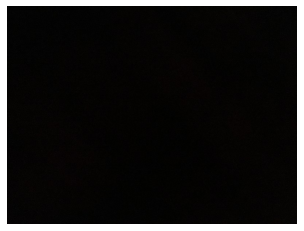

In [12]:
image = io.imread("samples/black.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

black_features = extractor(["samples/black.jpg"])

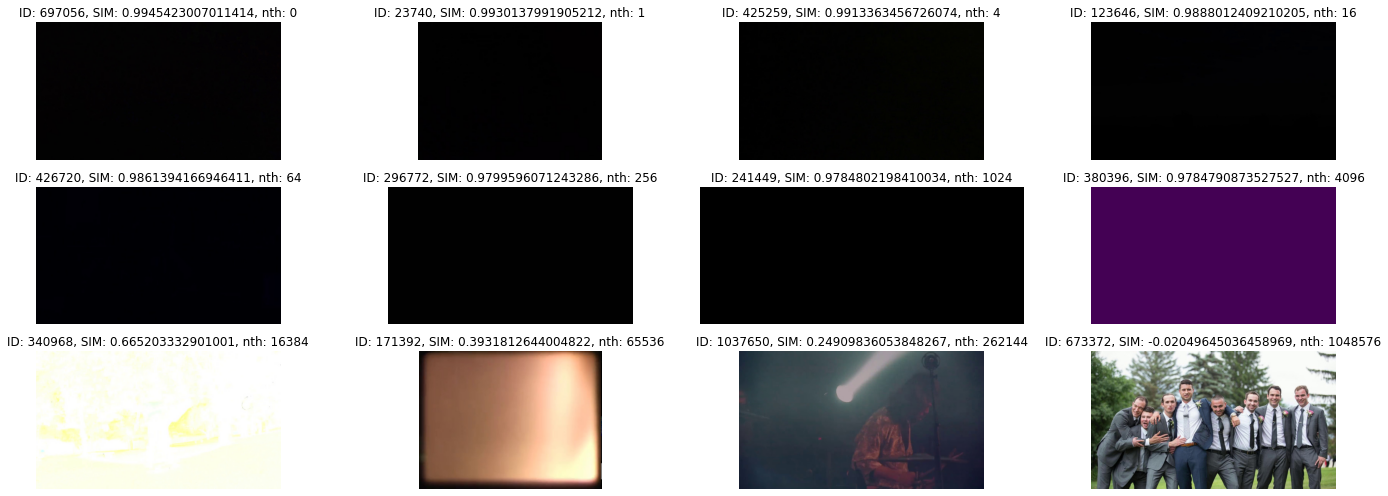

In [13]:
dataset.show_nth_neighbours(black_features[0], nths = [0] + [4 ** i for i in range(0, 11)])

Remove the neighbourhood around the black screen features.

In [14]:
dataset.filter_knn(black_features[0], 65536)

Now the results are computed on the filtered dataset.

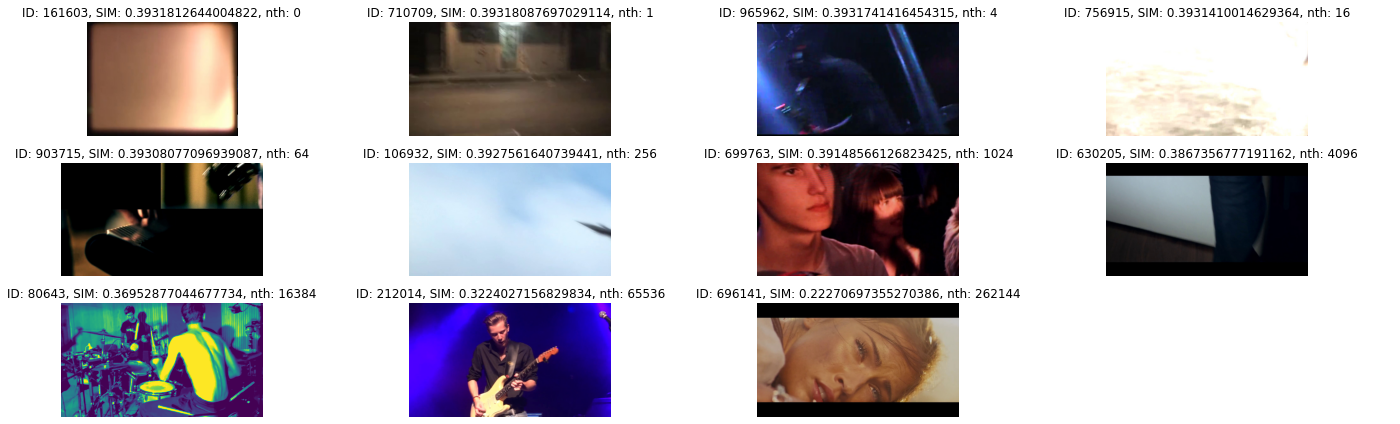

In [15]:
dataset.show_nth_neighbours(black_features[0], nths = [0] + [4 ** i for i in range(0, 10)])

We can revert the last filter operation with the back method.

In [16]:
dataset.back()

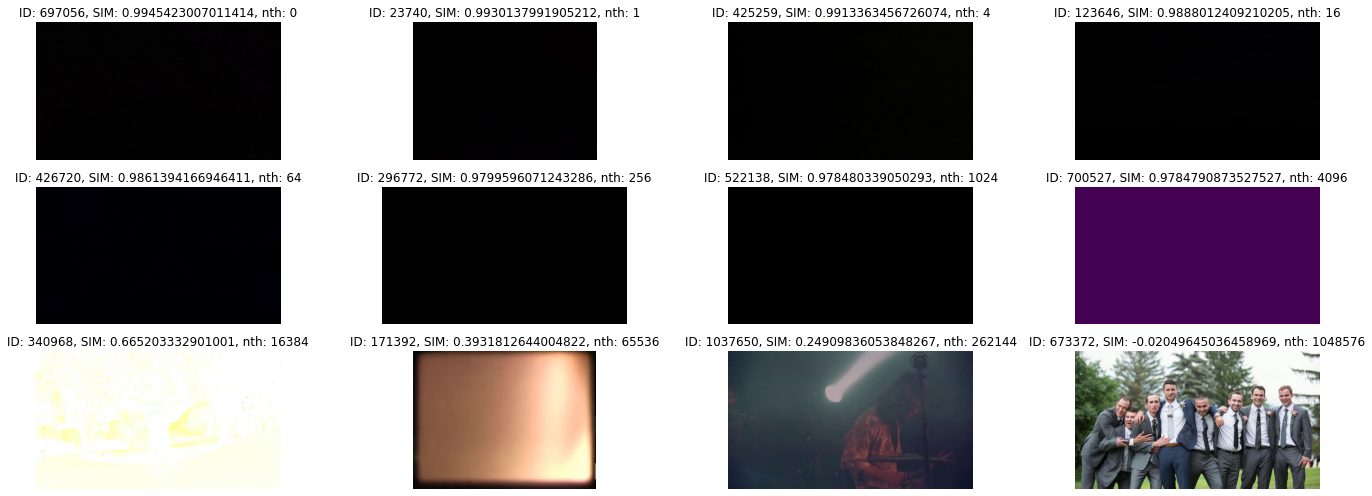

In [17]:
dataset.show_nth_neighbours(black_features[0], nths = [0] + [4 ** i for i in range(0, 11)])

In [18]:
dataset.filter_knn(black_features[0], 65536)

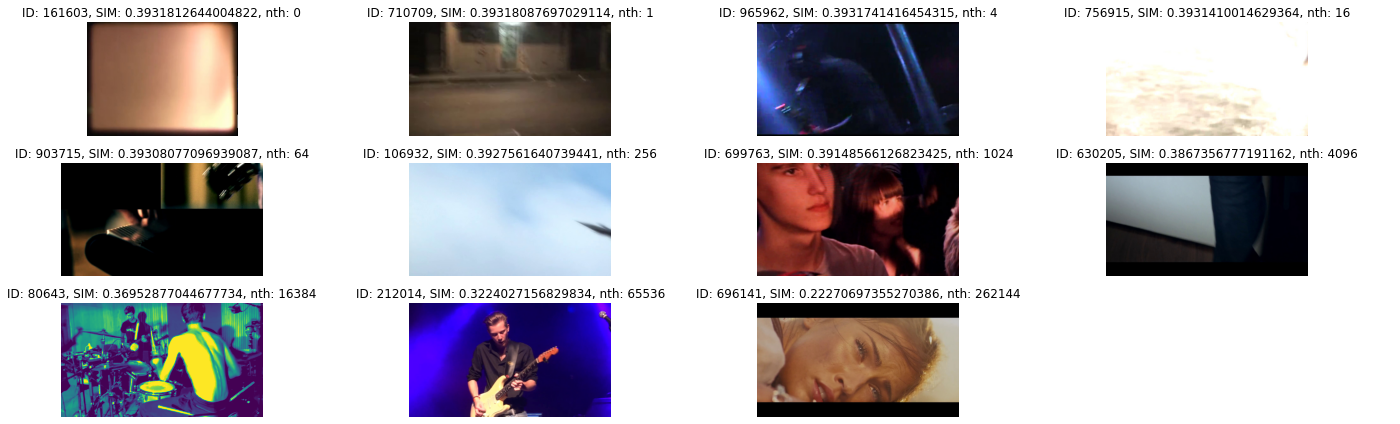

In [19]:
dataset.show_nth_neighbours(black_features[0], nths = [0] + [4 ** i for i in range(0, 10)])

Save the filtered dataset. We need to provide an output filename for the image list and the extracted features.

In [20]:
dataset.save("clean_features/imagelist_jpg.txt", "clean_features/ViTExtractor__.npy")